## Homework 3, Problem 3 on inhomogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2020, Prof. J.C. Kao, TAs J. Lee, T. Monsoor.


 In this problem, we will use the same simulated neuron as in
  Problem 2, but now the reaching angle $s$ will be time-dependent
  with the following form:
$$ s(t) = t^2 \cdot \pi,$$

where $t$ ranges between 0 and 1 second. This will be refered as *s(t)* equation in the questions.


In [ ]:
"""
ECE C143/C243 Homework-3 Problem-3

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (6 points) Spike trains
Generate 100 spike trains, each 1 second in duration, according to
an inhomogeneous Poisson process with a firing rate profile defined
by tuning equation, $$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$ 
and the $s(t)$ equation, $$ s(t) = t^2 \cdot \pi$$

In [ ]:
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 # trial length (ms)

In [ ]:
np.random.exponential(1.0/r_max * 1000)

Text(0.5, 1.0, 'Spike Trains')

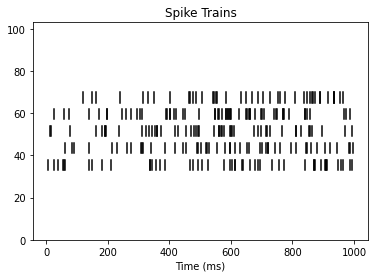

In [ ]:
## 3a
num_trials = 100 # number of total spike trains
num_rasters_to_plot = 5 # number of spike trains to plot
#====================================================#
# YOUR CODE HERE:
#   Generate the spike times for 100 trials of an inhomogeneous
#   Poisson process.  Plot 5 example spike rasters.
#====================================================#
spike_times = np.empty((1,100),dtype=list)
spike_probs = np.empty((1,100),dtype=list)
for rep in range(100):
  p = nsp.GeneratePoissonSpikeTrain(T,r_max)
  s_p = np.square(p/1000)*np.pi
  lprob = (r_0 + (r_max - r_0)*np.cos(s_p - s_max))/r_max
  s = np.random.uniform(0,1.0,len(lprob))
  l =np.multiply(1*(s<lprob),p)
  spike_times[0,rep] =l[l != 0]

num_rasters_to_plot = 5 # per condition
nsp.PlotSpikeRaster(spike_times[0, 0:num_rasters_to_plot])
plt.title('Spike Trains')
#====================================================#
# END YOUR CODE
#====================================================#


### (b) (5 points) Spike histogram
  Plot the spike histogram by taking spike counts in non-overlapping
  20 ms bins, then averaging across the 100 trials.  The spike
  histogram should have firing rate (in spikes / second) as the
  vertical axis and time (in msec, not time bin index) as the
  horizontal axis. Plot the expected firing rate profile defined by equations
 tuning equation and *s(t)* equation on the same plot. 

Text(0.5, 0, 'Time(ms)')

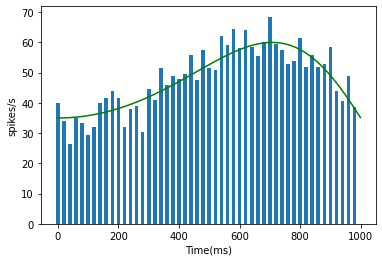

In [ ]:
# 3b
bin_width = 20 # (ms)
#====================================================#
# YOUR CODE HERE:
#   Plot the spike histogram
#====================================================#
x = np.arange(20,T+bin_width,step=bin_width)
spikeCounts = []
for s in x:
  sums = 0
  for rep in range(100):
    spikeCount = np.size(np.intersect1d(np.where(spike_times[0,rep]<=s),np.where(spike_times[0,rep]>(s-bin_width))))
    sums = sums + spikeCount
        
    averageSpikeC = sums*T/(num_trials*20)
  spikeCounts.append(averageSpikeC)
plt.bar(x-bin_width,spikeCounts,width=12)
t = np.arange(1000)
s = np.pi*np.square(t/1000)
l = r_0 + (r_max - r_0)*np.cos(s - s_max)
plt.plot(t,l,color = 'g')
#====================================================#
# END YOUR CODE
#====================================================#

plt.ylabel('spikes/s')
plt.xlabel('Time(ms)')

#### Question:
Does the spike histogram agree with the expected firing rate profile?

#### Your Answer:Yes


### (c) (6 points) Count distribution
  For each trial, count the number of spikes across the entire trial.
  Plot the normalized distribution of spike counts.  Fit a Poisson
  distribution to this empirical distribution and plot it on top of
  the empirical distribution.  

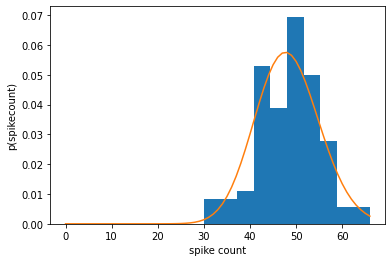

In [ ]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of spike counts
#====================================================#

spikeNum = []# each element in spike_counts is the total spike count for this reach direction and trial 
for rep in range(num_trials):
  spikeNum.append(np.size(spike_times[0,rep]))

max_count = max(spikeNum)
l = np.mean(spikeNum)
k = np.arange(0,max_count+1)

f = (np.exp(-l) * (l)**k)/scipy.special.factorial(k)

plt.hist(spikeNum,density=True)
plt.plot(k,f)
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('spike count')
plt.ylabel('p(spikecount)')
plt.show()

#### Question:
Should we expect the spike counts to be Poisson-distributed?

#### Your Answer:Yes

### (d) (5 points) ISI distribution
  Plot the normalized distribution of ISIs.  Fit an exponential
  distribution to the empirical distribution and plot it on top of the
  empirical distribution. 

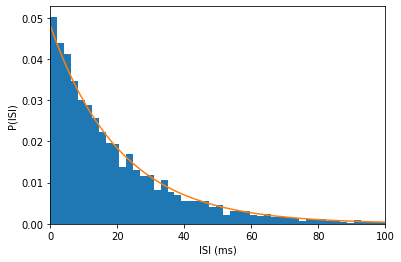

In [ ]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of ISIs
#====================================================#
isi = []
for rep in range(num_trials):
  for i in range(len(spike_times[0,rep])):
    try:
      isi.append(spike_times[0,rep][i+1] - spike_times[0,rep][i])
    except:
      pass
l = np.mean(spikeNum)/1000
t = np.arange(500)
plt.hist(isi,density = True,bins = 100)
f = l*np.exp(-l*t)
plt.plot(t,f)
plt.xlim([0,100])
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('ISI (ms)')
plt.ylabel('P(ISI)')
plt.show()

#### Question: 
Should we expect the ISIs to be exponentially-distributed?
(Note, it is possible for the  empirical distribution to strongly resemble an exponential distribution even if the data aren't exponentially distributed.)

#### Your Answer:No